## Problem Statement

Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Data Acquitision

Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sam4524","key":"ffc777bbb089bf4fcbbaa8e99bb0f32f"}'}

In [3]:
# Kaggle API Configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d balaka18/email-spam-classification-dataset-csv

Dataset URL: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
License(s): ODbL-1.0
email-spam-classification-dataset-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip email-spam-classification-dataset-csv

Archive:  email-spam-classification-dataset-csv.zip
replace emails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: emails.csv              


## Data Exploration

In [6]:
# Read the csv datafile
df = pd.read_csv("emails.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


<ipython-input-9-6e219cdee429>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


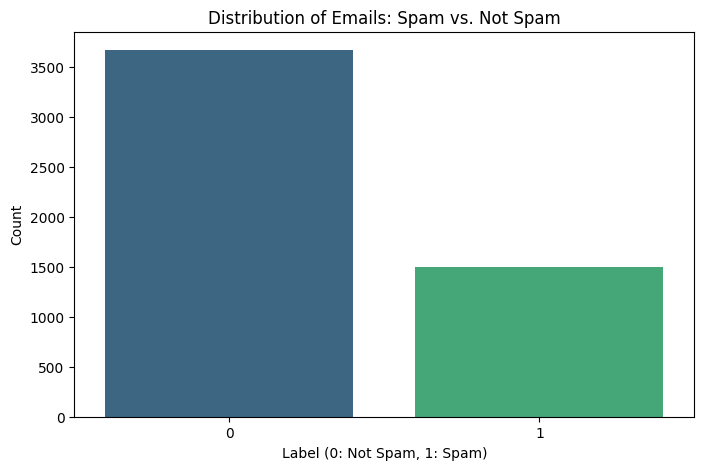

In [9]:
# Count the occurrences of each label
label_counts = df['Prediction'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Emails: Spam vs. Not Spam')
plt.xlabel('Label (0: Not Spam, 1: Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Define features and labels
X = df.iloc[:, 1:-1]  # All columns except the first (Email name) and last (label)
y = df.iloc[:, -1]     # The last column (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (4137, 3000)
Shape of X_test: (1035, 3000)
Shape of y_train: (4137,)
Shape of y_test: (1035,)


## Model Building

### K-Nearest Neighbour

In [12]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
knn_predictions = knn.predict(X_test)

In [13]:
# Print KNN classification report
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy:.4f}')


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035

KNN Accuracy: 0.8628


### SVM

In [14]:
# Initialize SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Make predictions
svm_predictions = svm.predict(X_test)

In [15]:
# Print SVM classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.4f}')


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

SVM Accuracy: 0.9594
